In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES
from sklearn.decomposition import PCA

from tqdm.notebook import tqdm

In [100]:
dataset_description = pd.read_csv('../Data/Dataset_Description.csv')

In [101]:
# dataset_description

In [102]:
population_data_raw = pd.read_csv('../Data/population.csv')
# population_data_raw 

In [103]:
def preprocessing(df):

    #replace ? with Nan
    df = df.replace({' ?' :  np.nan})

    #drop columns with more than 40$ NaN values
    cols = df.columns
    missing_percentages = (df.isna().sum() / len(df)) * 100
    cols_to_drop = []
    for col in cols:
        if(missing_percentages[col] > 40.0):
            cols_to_drop.append(col)
    print(f'Dropping = {cols_to_drop}')
    df = df.drop(cols_to_drop, axis=1)
    return df

In [104]:
data = preprocessing(population_data_raw)
print(data.shape)

Dropping = ['MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSUN']
(199523, 36)


In [105]:
def plot_histogram(df, numeric_columns, categorical_columns):
    # features = df.columns
    # for feat in features:
    #     plt.figure(figsize=(25,5))
    #     if(feat in numeric_columns):
    #         df[feat].hist(bins=10,edgecolor='black', linewidth=1.5)

    #     else:
    #         unique_cat_values = len(df[feat].unique())
    #         print(f'No. of unique Categories : {unique_cat_values}')
    #         df[feat].hist(bins = unique_cat_values, edgecolor='black', linewidth=1.5)
    #     plt.xlabel(feat)
    #     plt.ylabel('Count')
    #     plt.title(f'Histogram : {feat}')
    #     plt.savefig(f'../Plots/Feature_Analysis/{feat}_hist', facecolor='w', bbox_inches='tight')
    #     plt.show()
    features = df.columns
    for feat in features:
        plt.figure(figsize=(25, 5))
        # if(feat in numeric_columns)
        unique_cat_values = len(df[feat].unique())
        print(f'No. of unique Categories : {unique_cat_values}')
        df[feat].astype(str).hist(bins = unique_cat_values, edgecolor='black', linewidth=1.5)
        plt.xlabel(feat)
        plt.ylabel('Count')
        plt.title(f'Histogram : {feat}')
        plt.savefig(f'../Plots/Feature_Analysis/{feat}_hist', facecolor='w', bbox_inches='tight')
        plt.show()

In [106]:
def compute(df, col)
    max_freq = df[col].value_counts().max()
    max_perc = (max_freq / df.shape[0]) * 100
    print(max_perc)

92.0946457300662

In [107]:
def feature_analysis(df):
    data_columns = df.columns
    numeric_columns = ['AAGE', 'AHRSPAY', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'WKSWORK']
    all_cols_set = set(data_columns)
    numerical_cols_set = set(numeric_columns)
    categorical_cols = list(all_cols_set - numerical_cols_set)
    
    for col in numeric_columns:
        df[col] = pd.cut(x=df[col], bins=6)
    # df['AAGE']
    # plot_histogram(df, numeric_columns, categorical_cols)
    total_count = df.shape[0]

    cols_to_drop = []
    for col in data_columns:
        max_freq = df[col].value_counts().max()
        max_perc = (max_freq / total_count) * 100
        if(max_perc > 54.0):
            cols_to_drop.append(col)
    print(f'Dropping {len(cols_to_drop)} cols \n {cols_to_drop}')
    df = df.drop(cols_to_drop, axis=1)
    return df

    # print(df)


    # print(categorical_cols)


In [108]:
data = feature_analysis(data)

Dropping 20 cols 
 ['AHRSPAY', 'AHSCOL', 'ARACE', 'AREORGN', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'GRINREG', 'GRINST', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA', 'VETYN']


In [41]:
data['AAGE'].value_counts()

(-0.09, 15.0]    50348
(30.0, 45.0]     47635
(15.0, 30.0]     40989
(45.0, 60.0]     30154
(60.0, 75.0]     21234
(75.0, 90.0]      9163
Name: AAGE, dtype: int64

In [11]:
data.isna().sum()

AAGE        0
ACLSWKR     0
ADTIND      0
ADTOCC      0
AHGA        0
AMARITL     0
AMJIND      0
AMJOCC      0
ASEX        0
AWKSTAT     0
FILESTAT    0
HHDFMX      0
HHDREL      0
MIGSAME     0
NOEMP       0
WKSWORK     0
YEAR        0
dtype: int64

In [12]:
def column_modifications(df):
    column_modes = df.mode()
    data_cols = df.columns
    for col in data_cols:
        missing_vals = df[col].isna().sum()
        if(missing_vals > 0):
            df[col] = df[col].fillna(column_modes[col][0])
    one_hot_encoded = pd.get_dummies(df, columns=list(df.columns))
    df = one_hot_encoded

    return df        


In [13]:
data = column_modifications(data)
print(data.shape)

(199523, 257)


PCA

In [14]:
pca = PCA(2)
pca.fit(np.array(data))
B = pca.transform(np.array(data))



In [15]:
B

array([[ 1.3224896 ,  1.39665439],
       [-1.43986109, -0.93623666],
       [ 1.45765637,  1.35769056],
       ...,
       [-0.34975934,  0.67773375],
       [ 1.84782502,  1.34587127],
       [-1.43018415, -1.25771029]])

CLUSTERING

In [16]:
random_points = np.array(pd.DataFrame(B).sample(n=10)).tolist()

In [17]:
random_points

[[1.3204726710136836, -0.9400756636691254],
 [2.3824504234067057, -0.9797522724472387],
 [2.371568147272521, -0.6334626426445045],
 [0.19866706223937708, 1.246140940364905],
 [2.3357881166968726, -1.0160167153807427],
 [-1.8803176720099415, -0.9526265135627543],
 [-1.5960905860112575, -1.2145500291636637],
 [2.3334530241962494, 0.787620946767976],
 [-1.6124690247504505, 1.1230296966577933],
 [-1.3293529519173246, -1.2732374524059482]]

In [18]:
print('PERFORMING CLUSTERING')
medians_init = random_points
kmedians_instance = kmedians(B, medians_init)
kmedians_instance.process()
print('INSTANCE PROCESSED')
clusters = kmedians_instance.get_clusters()
medians = kmedians_instance.get_medians()
print('CLUSTERING PERFORMED')


PERFORMING CLUSTERING
INSTANCE PROCESSED
CLUSTERING PERFORMED


In [20]:
medians

[[0.939521665484506, -0.9119503778121573],
 [2.3824504234067057, -0.9797522724472387],
 [2.324905840562688, -0.6697270855780083],
 [0.8208749275094283, 1.392424769529708],
 [2.3357881166968726, -1.0160167153807427],
 [-1.584045082339903, -0.9088553138593471],
 [-1.7537145025365297, -1.2978472042673206],
 [2.286790717486417, 0.7513565038344721],
 [-1.8575802472835121, 1.0606685017308535],
 [-1.2048185098367619, -1.3065393304849686]]

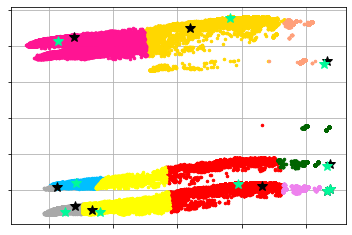

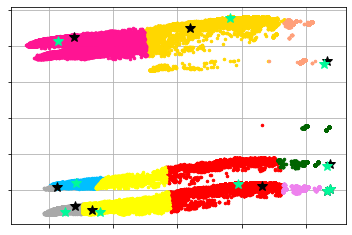

In [29]:
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, B)
visualizer.append_cluster(medians_init, marker='*', markersize=10)
visualizer.append_cluster(medians, marker='*', markersize=10)
visualizer.show()

In [20]:
# for k in tqdm(range(5, 11)):
#     # sample = read_sample(FCPS_SAMPLES.SAMPLE_TWO_DIAMONDS)
#     # initial_medians = [[0.0, 0.1], [2.5, 0.7]]
#     # kmedians_instance = kmedians(B, initial_medians)
#     # kmedians_instance.process()
#     # clusters = kmedians_instance.get_clusters()
#     # medians = kmedians_instance.get_medians()
#     # visualizer = cluster_visualizer()
#     # visualizer.append_clusters(clusters, sample)
#     # visualizer.append_cluster(initial_medians, marker='*', markersize=10)
#     # visualizer.append_cluster(medians, marker='*', markersize=10)
#     # visualizer.show()
#     if(k == 10):
#         print('PERFORMING CLUSTERING')
#         medians_init = random_points
#         kmedians_instance = kmedians(B, medians_init)
#         kmedians_instance.process()
#         print('INSTANCE PROCESSED')
#         clusters = kmedians_instance.get_clusters()
#         medians = kmedians_instance.get_medians()
#         print('CLUSTERING PERFORMED')
#         visualizer = cluster_visualizer()
#         visualizer.append_clusters(clusters, B)
#         visualizer.append_cluster(medians_init, marker='*', markersize=10)
#         visualizer.append_cluster(medians, marker='*', markersize=10)
#         visualizer.show()
#     else:
#         print(k)


  0%|          | 0/6 [00:00<?, ?it/s]

5
6
7
8
9
PERFORMING CLUSTERING
INSTANCE PROCESSED
CLUSTERING PERFORMED


KeyboardInterrupt: 

In [ ]:
# # print(data.isna().sum())
# column_modes = data.mode()
# upd_data_cols = data.columns
# for col in upd_data_cols:
#     missing_vals = data[col].isna().sum()
#     if(missing_vals > 0):
#         data[col] = data[col].fillna(column_modes[col][0])
# # data.isna().sum()